### Convolutional neural network using Tensorflow Functional API
<br><br />
This exercise is to implement a CNN which is very similar to the *LeNet-5* network made to identify hand written digits from the [MNIST database](http://yann.lecun.com/exdb/mnist/). The database was converted to a matlab file externally and imported as it is here.

Here *Tensorflow* data.Dataset API is also used to create a training dataset much like you would do on cloud for a data pipeline.<br><br />

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

MNIST database example digit:  9


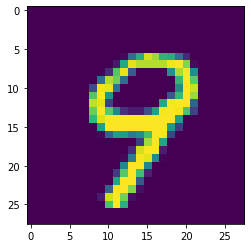

In [2]:
d = sio.loadmat("mnist.mat")

# -- 60,000 training samples --
im = d['trainX']  # (60000, 784) -- images
lb = d['trainY']  # (1, 60000) -- labels

# -- 10,000 test samples --
im_test = d['testX']  # (10000, 784) -- test images
lb_test = d['testY']  # (1, 10000) -- test labels

n = np.random.randint(0,high=60000)

# -- labelled sample from dataset --
print('MNIST database example digit: ', lb[0,n])
plt.imshow(im[n].reshape(28,28))
plt.show()

In [123]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [124]:
## -- Creating CNN model using TF functional API --

# -- input layer
in_put = tf.keras.Input(shape=(28,28,1))
# -- 2D conv layer
im_conv = tf.keras.layers.Conv2D(
    filters=8,
    kernel_size=5,
    activation='relu',
)(in_put)
# -- max pooling layer
pool1 = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
)(im_conv)
# -- 2D conv layer
im_conv2 = tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=5,
    activation='relu',
)(pool1)
# -- max pooling layer
pool2 = tf.keras.layers.MaxPool2D(
    pool_size=(2, 2),
)(im_conv2)
# -- dense layers
flat = tf.keras.layers.Flatten()(pool2)
a = tf.keras.layers.Dense(120, activation='relu')(flat)
b = tf.keras.layers.Dense(84, activation='relu')(a)
output = tf.keras.layers.Dense(10, activation='softmax')(b)

model = tf.keras.Model(in_put, output)

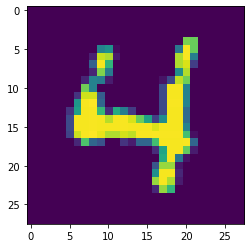

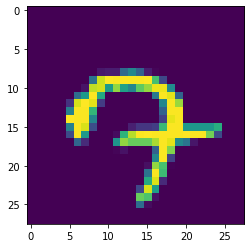

In [115]:
## -- creating dataset using TF Dataset API --
# -- creating epochs, batchsize and shuffling data every epoch --

EPOCHS = 6
BATCH_SIZE = 50
dataset = tf.data.Dataset.from_tensor_slices(((im/255.).reshape(-1,28,28,1), 
                                              to_categorical(lb.reshape(-1,1))))
dataset = dataset.shuffle(len(im), reshuffle_each_iteration=True).repeat(EPOCHS).batch(BATCH_SIZE)
# -- plotting two examples from the shuffled dataset
for i in dataset.take(2):
    plt.imshow(i[0][0])
    plt.show()

In [99]:
## -- compiling and training the model --
model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=['accuracy'])

model.fit(dataset)

7200/7200 [==============================] - 83s 12ms/step - loss: 0.0674 - accuracy: 0.9792


In [100]:
## -- evaluating the model with test data --

[loss, acc] = model.evaluate((im_test/255.).reshape(-1,28,28,1), 
                             to_categorical(lb_test.reshape(-1,1)), batch_size=1)
print(f'Accuracy on test data: {round(acc*100,1)} %')

10000/10000 [==============================] - 9s 884us/step - loss: 0.0378 - accuracy: 0.9882
Accuracy on test data: 98.8 %


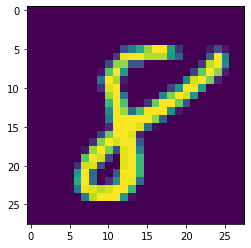

Answer: 8


In [120]:
## -- random output prediction --

n = np.random.randint(0,high=10000)

x = np.array(im_test[n]/255)
x = x.reshape(-1,28,28,1)

plt.imshow(x[0])
plt.show()

print(f'Answer: {np.argmax(model.predict(x))}')

In [106]:
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)             

In [121]:
## -- getting filter output from first convolution layer --
layer_name = 'conv2d_9'
intm_layer_model = tf.keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intm_output = intm_layer_model(x)

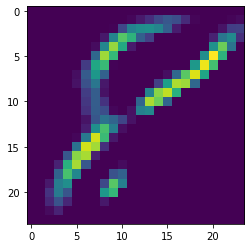

In [122]:
plt.imshow(intm_output[0][:,:,3])
plt.show()